In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [2]:
def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def openai_spend_on_largest_model_this_year(total_investment,
                                            percent_investment_spent_this_year,
                                            percent_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


gpt3_prediction = openai_spend_on_largest_model_this_year(total_investment=1*B,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_spend_on_compute=pct_dist(0.2, 0.7),
                                                          percent_compute_on_biggest_model=pct_dist(0.05, 0.15))


samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend is at the {}th percentile of the model'.format(round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '426 thousand',
 5: '828 thousand',
 10: '1 million',
 20: '2 million',
 30: '2 million',
 40: '3 million',
 50: '4 million',
 60: '5 million',
 70: '7 million',
 80: '9 million',
 90: '13 million',
 95: '19 million',
 99: '36 million'}
-
Actual spend is at the 30.0th percentile of the model


In [3]:
# OpenAI has 375 people as of 2023 Jan per https://twitter.com/sama/status/1617627882997813248
# if we assume it costs $500K per person and that payroll is half of non-compute costs, that means $375M per year is spent
largest_openai_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=10*B,
                                                                               percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                               percent_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '4 million',
 5: '9 million',
 10: '13 million',
 20: '21 million',
 30: '30 million',
 40: '39 million',
 50: '51 million',
 60: '67 million',
 70: '89 million',
 80: '123 million',
 90: '194 million',
 95: '279 million',
 99: '550 million'}


In [4]:
# https://www.nytimes.com/2023/01/27/technology/anthropic-ai-funding.html
largest_anthropic_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=300*M,
                                                                                  percent_investment_spent_this_year=pct_dist(0.1, 0.3),
                                                                                  percent_spend_on_compute=pct_dist(0.2, 0.8),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.1, 0.7))
samples = largest_anthropic_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '503 thousand',
 5: '1 million',
 10: '1 million',
 20: '2 million',
 30: '3 million',
 40: '4 million',
 50: '5 million',
 60: '7 million',
 70: '9 million',
 80: '13 million',
 90: '19 million',
 95: '27 million',
 99: '48 million'}


In [5]:
def google_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                            percent_r_and_d_on_ai,
                                            percent_ai_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)


largest_google_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, lclip=20*B),
                                                                               percent_r_and_d_on_ai=pct_dist(0.05, 0.5),
                                                                               percent_ai_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_google_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '394 thousand',
 5: '1 million',
 10: '2 million',
 20: '4 million',
 30: '7 million',
 40: '12 million',
 50: '20 million',
 60: '34 million',
 70: '60 million',
 80: '115 million',
 90: '286 million',
 95: '588 million',
 99: '2 billion'}


In [6]:
largest_fb_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, lclip=20*B),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                           percent_ai_spend_on_compute=pct_dist(0.2, 0.9),
                                                                           percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_fb_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '394 thousand',
 5: '847 thousand',
 10: '1 million',
 20: '3 million',
 30: '5 million',
 40: '8 million',
 50: '13 million',
 60: '21 million',
 70: '35 million',
 80: '66 million',
 90: '156 million',
 95: '314 million',
 99: '1 billion'}


In [7]:
mixed_model = (largest_openai_model_2023_prediction >>
               sq.dist_max(largest_anthropic_model_2023_prediction) >>
               sq.dist_max(largest_google_model_2023_prediction) >>
               sq.dist_max(largest_fb_model_2023_prediction))
mixed_model

<Distribution> max(max(max(log10(10000000000 * lognorm(mean=-2.1, sd=0.7, lclip=0.001, rclip=1) * lognorm(mean=-0.86, sd=0.59, lclip=0.001, rclip=1) * lognorm(mean=-2.3, sd=0.54, lclip=0.001, rclip=1)), log10(300000000 * lognorm(mean=-1.75, sd=0.43, lclip=0.001, rclip=1) * lognorm(mean=-0.92, sd=0.54, lclip=0.001, rclip=1) * lognorm(mean=-1.33, sd=0.76, lclip=0.001, rclip=1))), log10(norm(mean=31000000000.0, sd=5471611487.21, lclip=20000000000) * lognorm(mean=-1.84, sd=0.9, lclip=0.001, rclip=1) * lognorm(mean=-0.86, sd=0.59, lclip=0.001, rclip=1) * lognorm(mean=-4.61, sd=1.8, lclip=0.001, rclip=1))), log10(norm(mean=31000000000.0, sd=5471611487.21, lclip=20000000000) * lognorm(mean=-2.3, sd=0.54, lclip=0.001, rclip=1) * lognorm(mean=-0.86, sd=0.59, lclip=0.001, rclip=1) * lognorm(mean=-4.61, sd=1.8, lclip=0.001, rclip=1)))

In [8]:
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '11 million',
 5: '20 million',
 10: '28 million',
 20: '42 million',
 30: '58 million',
 40: '77 million',
 50: '102 million',
 60: '135 million',
 70: '185 million',
 80: '274 million',
 90: '499 million',
 95: '853 million',
 99: '3 billion'}


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 7.0,
 5: 7.3,
 10: 7.4,
 20: 7.6,
 30: 7.8,
 40: 7.9,
 50: 8.0,
 60: 8.1,
 70: 8.3,
 80: 8.4,
 90: 8.7,
 95: 9.0,
 99: 9.4}


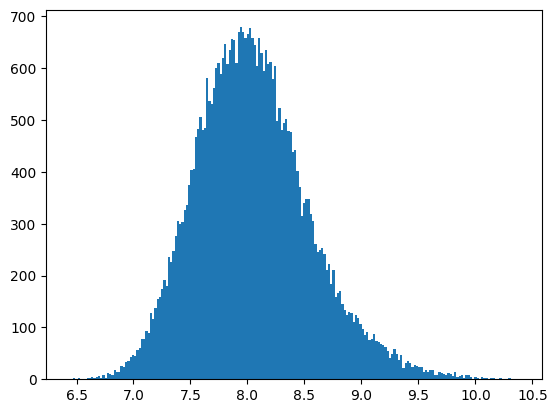

In [9]:
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()